# Taller 4

1. [Ejemplos y resultados -Kutz (página 24)-](#primero)
    - [Series y transformadas de Fourier](#12.1)
    - [Aplicaciones del FFT: Detección y filtrado](#12.2)
    - [Aplicaciones del FFT: Detección y promedio](#12.3)
    - [Análisis de tiempo y frecuencia](#12.4)
1. [Ejemplo propio](#segundo)

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
#Carpeta para guardar las gráficas
output_dir = os.path.join( '.','output') 

Populating the interactive namespace from numpy and matplotlib


## 1. Ejemplos y resultados -Kutz- <a name="primero"></a>


La idea general de utilizar una transformada de Fourier es **representar funciones y sus derivadas** como sumas de senos y cosenos. Esto se puede hacer a través de una una FFT (Fast-Fourirer transform).  

#### Series y transfomadas de Fourier <a name="12.1"></a>

La transformada de Fourier es una integral definida desde -$\infty$ hasta $\infty$.<br /> 
$F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-ikx}f(x)\mathrm{d}x$ <br />
Su inversa se define como: <br />
$f(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{ikx}F(k)\mathrm{d}k$ <br />
En relación con la derivada de una función, se llega a que la transformada de Fourier de una derivada, representada como $\widehat{f'(x)}$ es la siguiente: 
$\widehat{f'(x)} = ik\widehat{f(x)}$ y en general 
$\widehat{f^{n}(x)} = (ik)^n\widehat{f(x)}$


**Ejemplos**

1. Si tenemos una ecuación diferencial de segundo orden como la siguiente:
$y'' - \omega^2y = -f(x) \hspace{5mm} x \in [-\infty,\infty]$ <br />
Sacando la transformada de cada función:
$\widehat{y''}-\omega^2\widehat{y} = -\widehat{f}$ <br />
Que equivale a:
$i^2k^2\widehat{y}-\omega^2\widehat{y} = -\widehat{f}$ <br />
$-k^2\widehat{y}-\omega^2\widehat{y} = -\widehat{f}$ <br />
Despejando para $\widehat{y}$: <br />
$\widehat{y} =  \frac{\widehat{f}}{k^2+\omega^2}$
La **solución** de esta ecuación diferencial de segundo orden, utilizando la ecuación de la inversa de la transformada, sería:
$y(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{ikx} \frac{\widehat{f}}{k^2+\omega^2} \mathrm{d}k$<br />
Y el resultado de esta integral se puede evaluar numéricamente.



    En cuanto a código:


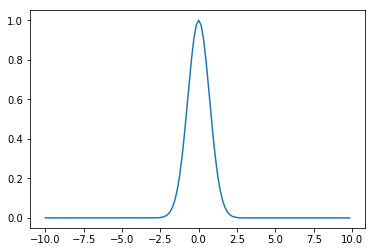

In [2]:
L = 20    #Dominio de la función
n = 128   #Cuantas series de Fourier se crean (Fourier mode = 2^n)
x2 = linspace(-L/2,L/2,n+1)
x = x2[0:n]
dx = x[1]-x[0]
u = exp(-x*x)
plt.plot(x,u)
plt.show()

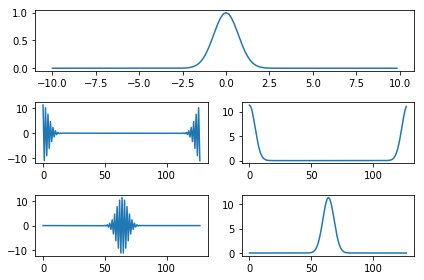

In [3]:
ut = fft.fft(u)
utshift = fft.fftshift(ut)
plt.figure(1)
plt.subplot(311)
plt.plot(x,u)

plt.subplot(323)
plt.plot(real(ut))

plt.subplot(324)
plt.plot(abs(ut))

plt.subplot(325)
plt.plot(real(utshift))

plt.subplot(326)
plt.plot(abs(utshift))

plt.tight_layout()
pylab.savefig(os.path.join(output_dir,'12.1.png'), dpi=180)
plt.show()


    2. La función FFT puede usarse para generar las derivadas globales de la función ya que los senos y cosenos se expanden a lo largo de toda la función. En el ejemple hacen la primera y segunda derivada de la funcion de secante hiperbólico de x como se muestra a continuación.

In [4]:
ux = 1/cosh(x)
utx = fft.fft(ux)
vectfour = concatenate((arange(0,n/2),arange(-n/2,0)))
k = (2*pi/L)*(vectfour)

Primera derivada

In [5]:
utx1 = 1j*k*utx

Segunda derivada

In [6]:
utx2 = -k*k*utx

Eligiendo los valores reales, no complejos

In [7]:
u1 = real(fft.ifft(utx1))
u2 = real(fft.ifft(utx2))


Derivadas exactas

In [8]:
u1exacto = -ux * tanh(x)
u2exacto = ux - 2*ux**3 

Ahora con diferencias finitas 

In [9]:
# De segundo orden
ufini = zeros(size(ux))
ufini[0]=(-3*ux[0]+4*ux[1]-ux[2])/(2*dx)
for i in range(1,n-1):
    ufini[i] = (ux[i+1]-ux[i-1])/(2*dx)
ufini[-1] = (3*ux[-1]-4*ux[-2]+u[-3])/(2*dx)

#De cuarto orden
ufini2 = zeros(size(ux))
ufini2[0] = (-3*ux[0]+4*ux[1]-ux[2])/(2*dx)
ufini2[1] = (-3*ux[1]+4*ux[2]-ux[3])/(2*dx)
for i in range(2,n-2):
    ufini2[i] = (-ux[i+2]+8*ux[i+1]-8*ux[i-1]+ux[i-2])/(12*dx)
ufini2[-2] = (3*ux[-2]-4*ux[-3]+u[-4])/(2*dx)    

Gráficas para comparar la darivada exacta con Fourier

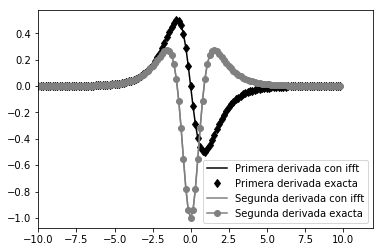

In [10]:

#plt.plot(x,ux,'b')
plt.plot(x,u1,'k',label = 'Primera derivada con ifft')
plt.plot(x,u1exacto,'kd',label = 'Primera derivada exacta')
plt.plot(x,u2,'grey',label='Segunda derivada con ifft')
plt.plot(x,u2exacto,color='grey',marker='o',label='Segunda derivada exacta')
plt.xlim(-10,12)
plt.legend(loc='best')

plt.show()



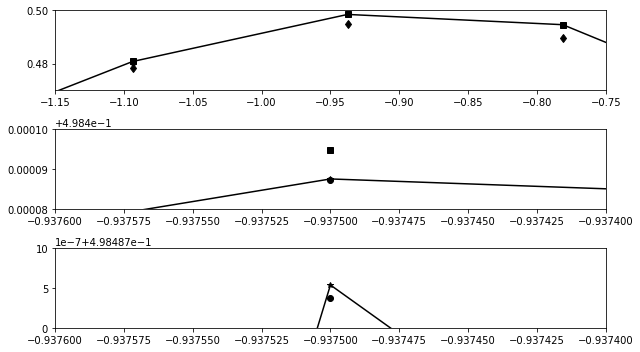

In [11]:
plt.figure(1,figsize=(9,5))
plt.subplot(311)
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-1.15, -0.75, 0.47, 0.5])
plt.subplot(312)
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-0.9376,-0.9374,0.49848,0.49850])
plt.subplot(313)
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-0.9376,-0.9374,0.498487,0.498488])

plt.tight_layout()
plt.show()

## Aplicaciones de FFT: Detección y filtrado <a name="12.2"></a>

In [49]:
L2 = 30
n2 = 512
t2 = linspace(-L2,L2,n2+1)
t = t2[0:n2]
vectfour2 = concatenate((arange(0,n2/2),arange(-n2/2,0)))
k2= (2*pi/(2*L2))*(vectfour2)
ux2 = 1/cosh(t)


In [50]:
noise = 1
ut122 = fft.fft(ux2)
utn122 = ut122+noise*(randn(n2)+1j*randn(n2))
un122 = fft.ifft(utn122)


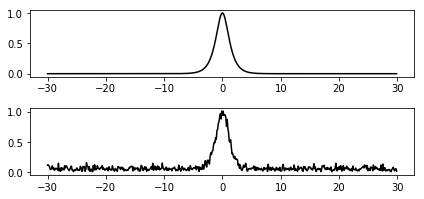

In [51]:
plt.figure(1)

plt.subplot(311)
plt.plot(t,ux2,'k')

plt.subplot(312)
plt.plot(t,abs(un122),'k')
plt.tight_layout()
plt.show()

In [52]:
noise = 10 
ut122 = fft.fft(ux2)
utn122 = ut122+noise*(randn(n2)+1j*randn(n2))
un122 = fft.ifft(utn122)

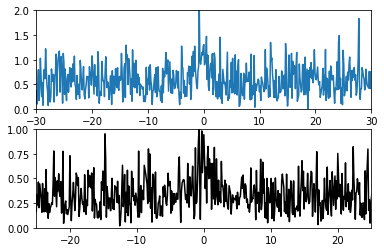

In [53]:
plt.figure(1)
plt.subplot(211)
plt.plot(t,abs(un122))
plt.axis([-30, 30, 0 ,2 ])
plt.subplot(212)
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'k')
plt.axis([-25,25,0,1])
plt.show()

Filtro Gaussiano:<br />
$\mathcal{F}(k)=exp(-\mathcal{T}(k-k_0)^2)$


La señal deseada se centra a una número de onda alrededor de 0 por eso $k_0 = 0$ en el filtro mostrado a continuación.

In [69]:
f = exp(-0.2*(k2)**2)
utfn122 = f*utn122
ufn122=fft.ifft(utfn122)

Los resultados varían en gran medida dependiendo los valores aleatorios asignados por "randn" al momento de agregar el ruido.

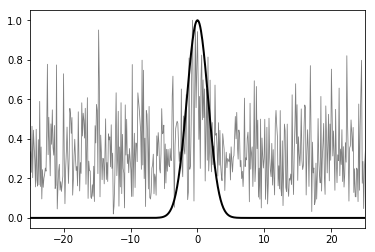

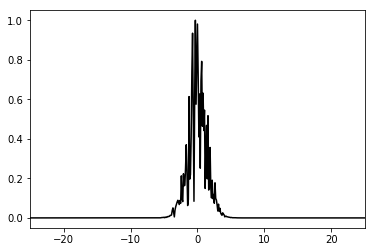

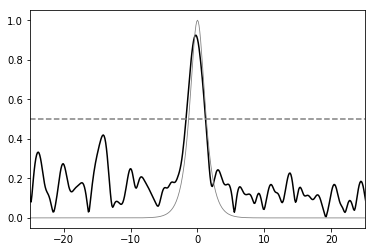

In [70]:
plt.figure(1)
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'grey',lw=0.8)
plt.plot(fft.fftshift(k2),fft.fftshift(f),'k',lw=2)
plt.xlim(-25,25)

plt.figure(2)
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utfn122))/max(abs(fft.fftshift(utfn122))),'k')
plt.xlim(-25,25)

plt.figure(3)
plt.plot(t,abs(ufn122),'k')
plt.plot(t,ux2,'grey',lw=0.8)
plt.axhline(y=0.5,color='grey',linestyle='--')
plt.xlim(-25,25)
plt.show()

Si cambiamos el valor de $k_0$ entonces ya no se va a encontrar la señal deseada, como se muestra a continuación:

In [77]:
k0 = 15
f = exp(-0.2*(k2-k0)**2)
utfn122 = f*utn122
ufn122=fft.ifft(utfn122)

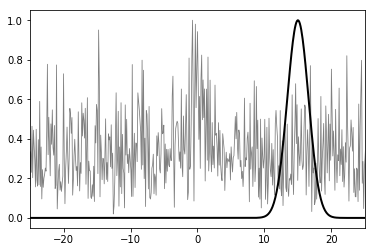

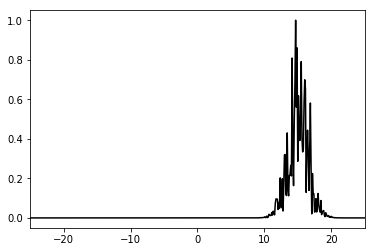

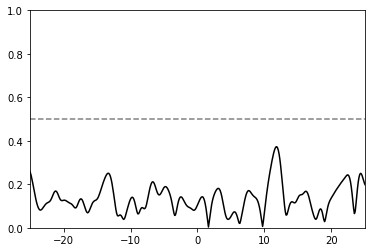

In [78]:
plt.figure(1)
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'grey',lw=0.8)
plt.plot(fft.fftshift(k2),fft.fftshift(f),'k',lw=2)
plt.xlim(-25,25)

plt.figure(2)
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utfn122))/max(abs(fft.fftshift(utfn122))),'k')
plt.xlim(-25,25)

plt.figure(3)
plt.plot(t,abs(ufn122),'k')
plt.axhline(y=0.5,color='grey',linestyle='--')
plt.xlim(-25,25)
plt.ylim(0,1)
plt.show()

### Aplicaciones de FFT: Detección y promedio <a name="12.3"></a>

Tomando los valores de L, n, t, k, y ruido de la sección anterior se busca hacer un filtro que funcione mejor al promediar valores

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


IndexError: list index out of range

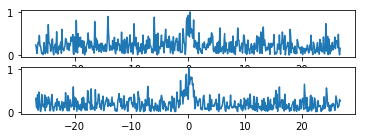

In [116]:
ks = fft.fftshift(k2)
muestras = [1,2,5,100]
for i in range(size(muestras)):
    utn123 = zeros((muestras[i],n2))
    ave = zeros(n2)
    for j in range(muestras[i]):
        utn123[j] = ut122+noise*(randn(n2)+1j*randn(n2))
        ave = ave+utn123[j]
    ave = abs(fft.fftshift(ave))/muestras[j]
    m = i+1
    plt.subplot(4,1,m)
    plt.plot(ks,ave/max(ave))


In [105]:
utn123

array([[ 29.04748363, -33.81399956,   1.48961039, ..., -10.35863693,
         37.51326483, -10.73158973],
       [ 23.71189419, -27.16903136,   6.96788481, ..., -25.19598081,
         26.40285118, -12.01909382],
       [ 16.53264807, -29.49100248,  38.91508204, ..., -21.16699858,
          7.10976681, -34.89375182],
       ..., 
       [ 18.86515081, -13.53809711,  31.48861372, ..., -47.67269357,
         27.41225776, -31.83202426],
       [ 31.03268132, -29.75894227,  33.7468549 , ..., -19.39044745,
         24.55711183, -30.41427853],
       [ 35.29800794, -29.07544933,  36.57461306, ...,  -5.85948165,
         34.34201116, -19.23531474]])

#### Análisis de tiempo y frecuecia <a name="12.4"></a>

## 2. Ejemplo  propio <a name="segundo"></a>